## Classical Electrodynamics II
### Assignment 01

**Student Name :** Santanu Dutta \
**Email ID:** santanu.dutta_255@tifr.res.in

#### Question 1.(b)

#### Solution :
| **Serial No.** | **Maxwell Equation (in S)** | **Galilean Transformation (S')** | **Lorentz Transformation (S')** |
|----------------|------------------------------|----------------------------------|----------------------------------|
| 1. | $\vec{\nabla} \cdot \vec{E} = \dfrac{\rho}{\epsilon_0}$ | $\vec{\nabla} \cdot \vec{E} = \dfrac{\rho}{\epsilon_0} + \vec{v} \cdot (\vec{\nabla} \times \vec{B})$ | Invariant |
| 2. | $\vec{\nabla} \cdot \vec{B} = 0$ |$\vec{\nabla} \cdot \vec{B} = 0$ | Invariant |
| 3. | $\vec{\nabla} \times \vec{E} = - \dfrac{\partial \vec{B}}{\partial t}$ | $\vec{\nabla} \times \vec{E} = - \dfrac{\partial \vec{B}}{\partial t}$ | Invariant |
| 4. | $\vec{\nabla} \times \vec{B} = \mu_0 \left( \vec{J} + \epsilon_0 \dfrac{\partial \vec{E}}{\partial t} \right)$ | $\vec{\nabla} \times \vec{B} = \mu_0 \left( \vec{J} + \epsilon_0 \dfrac{\partial \vec{E}}{\partial t} \right) + \mu_0 \left( \rho \vec{v} - \epsilon_0 \dfrac{\partial (\vec{v} \times \vec{B})}{\partial t} - \epsilon_0 (\vec{v} \cdot \vec{\nabla})(\vec{E} - \vec{v} \times \vec{B}) \right)$ | Invariant |


For plotting the results of GT and LT of Maxwell eqautions, to make simpler calcualtion lets take natural units
$\mu_0 = 1, \epsilon_0 = 1$ and also the field values $E= 1, B= 1$ and curent density $J= 1$, charge density $ \rho = 1$.

 **Serial No.** | **Maxwell Equation (in S)** | **Deviation in  Galilean Transformation (S')** | **Deviation in Lorentz Transformation (S')** |
|----------------|------------------------------|----------------------------------|----------------------------------|
| 1. | $\vec{\nabla} \cdot \vec{E} = \dfrac{\rho}{\epsilon_0}$ | $v$ | $0$|
| 2. | $\vec{\nabla} \cdot \vec{B} = 0$ |$0$ | 0 |
| 3. | $\vec{\nabla} \times \vec{E} = - \dfrac{\partial \vec{B}}{\partial t}$ | $0$ | $0$ |
| 4. | $\vec{\nabla} \times \vec{B} = \mu_0 \left( \vec{J} + \epsilon_0 \dfrac{\partial \vec{E}}{\partial t} \right)$ | $\mu_0 v(\rho- 2 \epsilon_0)$ |$0$|


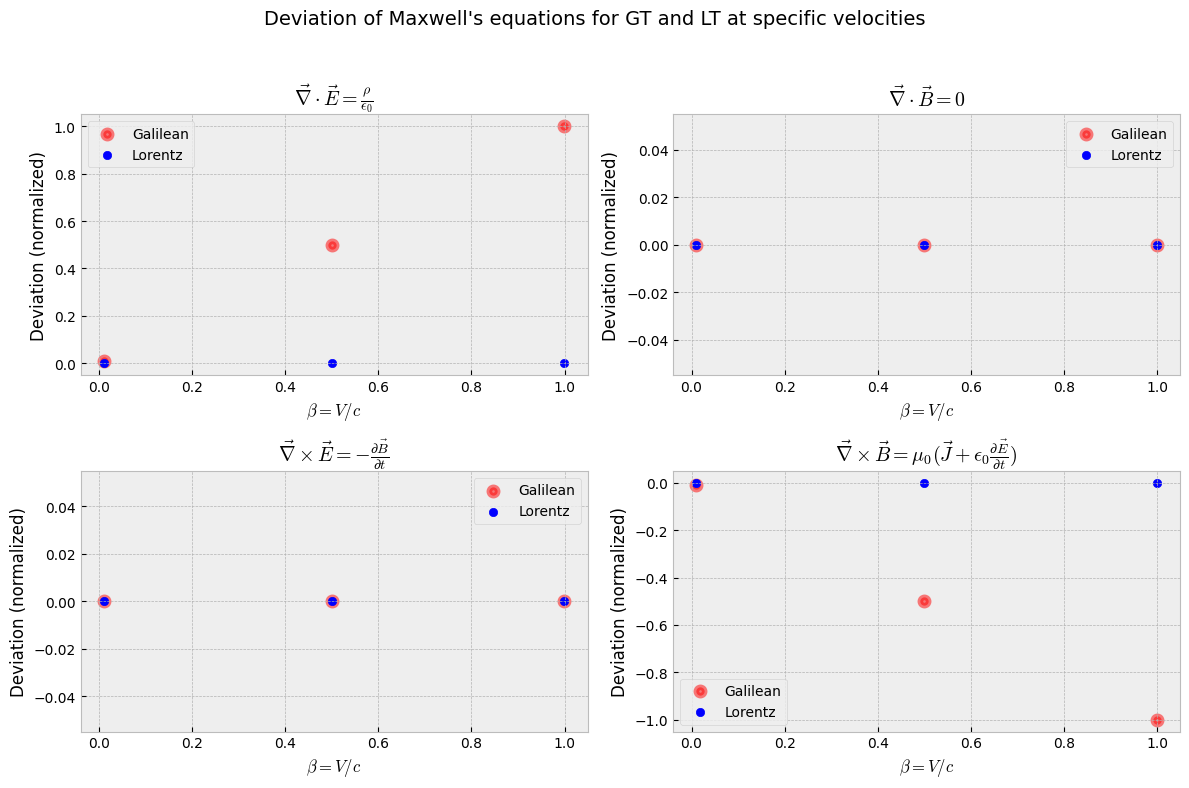

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Specific velocities (in units of c)
beta_values = np.array([0.01, 0.5, 0.9999])
labels = [r"$v=0.01c$", r"$v=0.5c$", r"$v=0.9999c$"]

# Constants (normalized)
epsilon_0 = 1
mu_0 = 1
rho = 1

# Galilean deviations
def delta_ME1(v): return v
def delta_ME2(v): return 0
def delta_ME3(v): return 0
def delta_ME4(v): return mu_0*v * (rho - 2 * epsilon_0)

# Compute deviations
deviations_galilean = {
    r"$\vec{\nabla} \cdot \vec{E} = \frac{\rho}{\epsilon_0}$": delta_ME1(beta_values),
    r"$\vec{\nabla} \cdot \vec{B} = 0$": np.array([delta_ME2(v) for v in beta_values]),
    r"$\vec{\nabla} \times \vec{E} = - \frac{\partial \vec{B}}{\partial t}$": np.array([delta_ME3(v) for v in beta_values]),
    r"$\vec{\nabla} \times \vec{B} = \mu_0(\vec{J} + \epsilon_0 \frac{\partial \vec{E}}{\partial t})$": delta_ME4(beta_values),
}

# Lorentz deviations are zero
deviations_lorentz = {
    key: np.zeros_like(beta_values) for key in deviations_galilean
}

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
equations = list(deviations_galilean.keys())

for i, ax in enumerate(axs.flat):
    eq = equations[i]
    ax.scatter(beta_values, deviations_galilean[eq], color='red', linewidth= 4, alpha = 0.5, label='Galilean')
    ax.scatter(beta_values, deviations_lorentz[eq], color='blue', alpha= 1, label='Lorentz')
    ax.set_title(eq)
    ax.set_xlabel(r'$\beta = V/c$', fontsize= 12)
    ax.set_ylabel('Deviation (normalized)', fontsize= 12)
    ax.grid(True)
    ax.legend(loc= 'best')

plt.suptitle(r"Deviation of Maxwell's equations for GT and LT at specific velocities", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

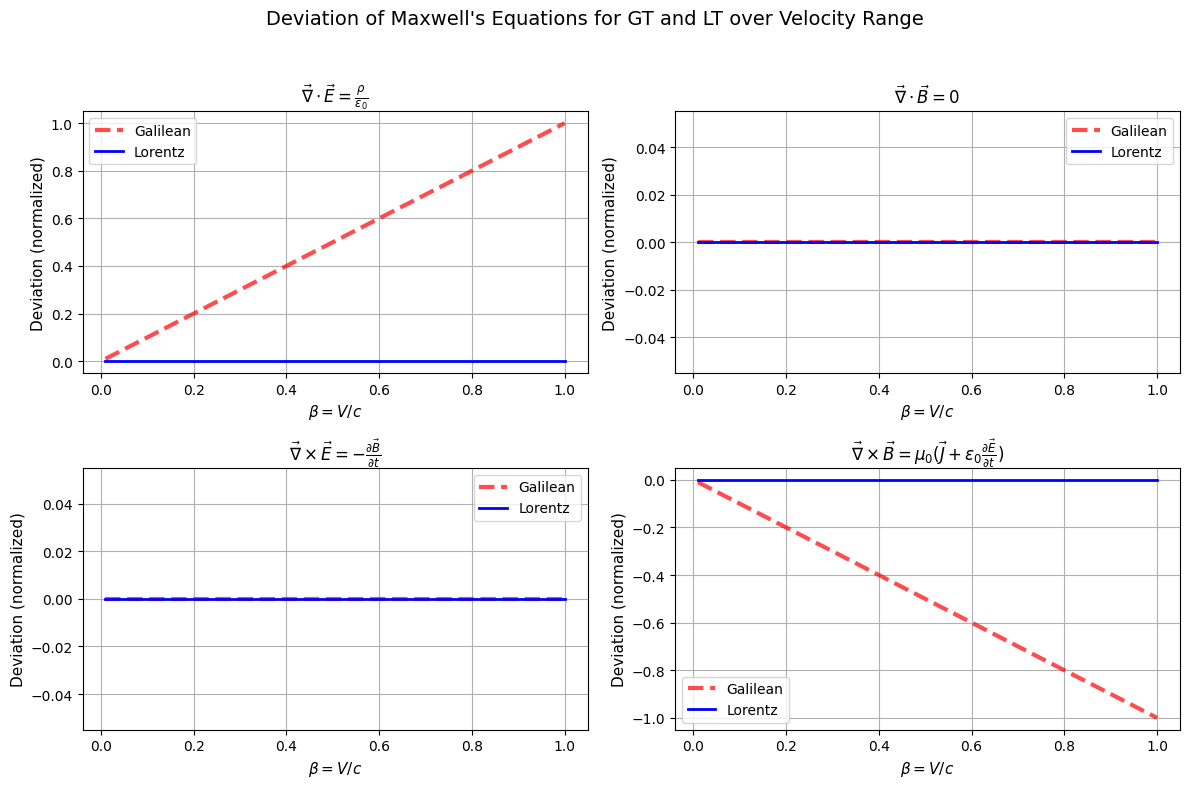

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Continuous velocity range (from 0.01c to 0.9999c)
beta_values = np.linspace(0.01, 0.9999, 500)

# Constants (normalized)
epsilon_0 = 1
mu_0 = 1
rho = 1

# Deviation functions
def delta_ME1(v): return v
def delta_ME2(v): return 0 * v
def delta_ME3(v): return 0 * v
def delta_ME4(v): return v * (rho - 2 * epsilon_0)

# Compute deviations over the velocity range
deviations_galilean = {
    r"$\vec{\nabla} \cdot \vec{E} = \frac{\rho}{\epsilon_0}$": delta_ME1(beta_values),
    r"$\vec{\nabla} \cdot \vec{B} = 0$": delta_ME2(beta_values),
    r"$\vec{\nabla} \times \vec{E} = - \frac{\partial \vec{B}}{\partial t}$": delta_ME3(beta_values),
    r"$\vec{\nabla} \times \vec{B} = \mu_0(\vec{J} + \epsilon_0 \frac{\partial \vec{E}}{\partial t})$": delta_ME4(beta_values),
}

# Lorentz deviations (still zero)
deviations_lorentz = {
    key: np.zeros_like(beta_values) for key in deviations_galilean
}

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
equations = list(deviations_galilean.keys())

for i, ax in enumerate(axs.flat):
    eq = equations[i]
    
    # Line plot for Galilean deviations
    ax.plot(beta_values, deviations_galilean[eq], 'r--', linewidth=3, alpha=0.7, label='Galilean')
    
    # Line plot for Lorentz deviations (flat zero)
    ax.plot(beta_values, deviations_lorentz[eq], 'b-', linewidth=2, alpha=1, label='Lorentz')
    
    ax.set_title(eq, fontsize=12)
    ax.set_xlabel(r'$\beta = V/c$', fontsize=11)
    ax.set_ylabel('Deviation (normalized)', fontsize=11)
    ax.grid(True)
    ax.legend(loc='best')

plt.suptitle(r"Deviation of Maxwell's Equations for GT and LT over Velocity Range", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


#### Question 2.(a)

#### Solution :

The transformation equations are 

$ x'= x \cosh{\psi} - ct\sinh{\psi}, ct'= ct\cosh{\psi} - x\sinh{\psi} \quad $ ,where $\beta = \tanh{\psi}$

* For getting $x'$ axis:
  Along the $x'$ axis $ct'= 0 \implies ct\cosh{\psi} - x\sinh{\psi}= 0 \implies  ct = x \tanh{\psi}$  \
  $ ct'= \beta \times x $( equation for x' axis )
* For getting $ct'$ axis:
  Along the $ct'$ axis $x'= 0 \implies x\cosh{\psi} - ct\sinh{\psi}= 0 \implies  x = ct \tanh{\psi}$  \
  $ x'= \beta \times ct $( equation for ct' axis )

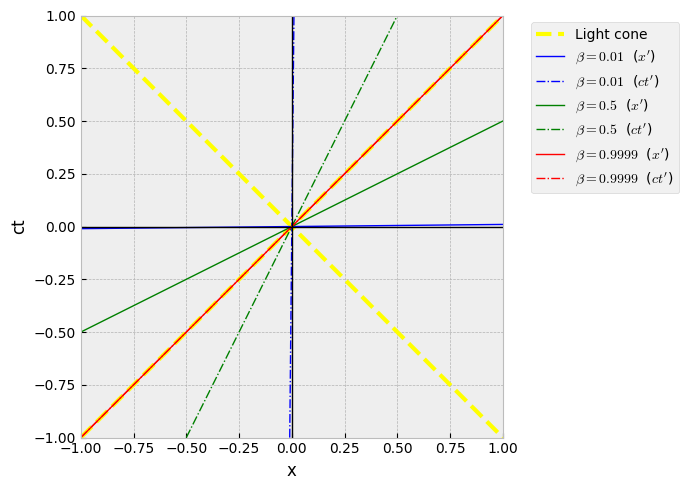

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as sc

#limits of x and ct axis
a, b= 1, 1

#range of x and ct coordiantes 
x_values= np.linspace(-a, a, 500)
ct_values= np.linspace(-b, b,500)

# Define lorentz transformation equation 
def x_prime(x, psi):
    return x*np.cosh(psi)- ct*np.sinh(psi)

def ct_prime(ct, psi):
    return ct*np.cosh(psi)- x*np.sinh(psi)

#velocity/c = beta
beta_values= [0.01, 0.5, 0.9999]
colors = ['blue', 'green', 'red']
labels = [r"$\beta = 0.01$", r"$\beta = 0.5$", r"$\beta = 0.9999$"]


# Plotting
plt.figure(figsize= (8,5), facecolor= 'white')

# Plot light cones (x = ±ct)
plt.plot(x_values, x_values, color='yellow', linestyle='--', linewidth=3, label= r"Light cone")
plt.plot(x_values, -x_values, color='yellow', linestyle='--', linewidth=3)

# Plot boosted axes for each beta values
for beta, color, label in zip(beta_values, colors, labels):
    psi = np.arctanh(beta)  # Rapidity

    # x'-axis: ct' = 0 → ct = tanh(psi) * x
    ct_xp = beta * x_values
    plt.plot(x_values, ct_xp, color=color, linestyle='-', linewidth=1, label=f"{label}  ($x'$)")

    # ct'-axis: x' = 0 → x = tanh(psi) * ct
    x_ctp = beta * ct_values
    plt.plot(x_ctp, ct_values, color=color, linestyle='-.', linewidth=1, label=f"{label}  ($ct'$)")


#plt.title(r"Space time diagram under LT", fontsize= 15)
plt.xlabel(r"x", fontsize= 12)
plt.ylabel(r"ct", fontsize= 12)
plt.xlim(-a, a)
plt.ylim(-b, b)
plt.axhline(0, color='black', linewidth=1)  # x-axis
plt.axvline(0, color='black', linewidth=1)  # ct-axis
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

#### Question 3

The relative lifetime of the particle for three different velocities are [ 1.00005  1.1547  70.71245]


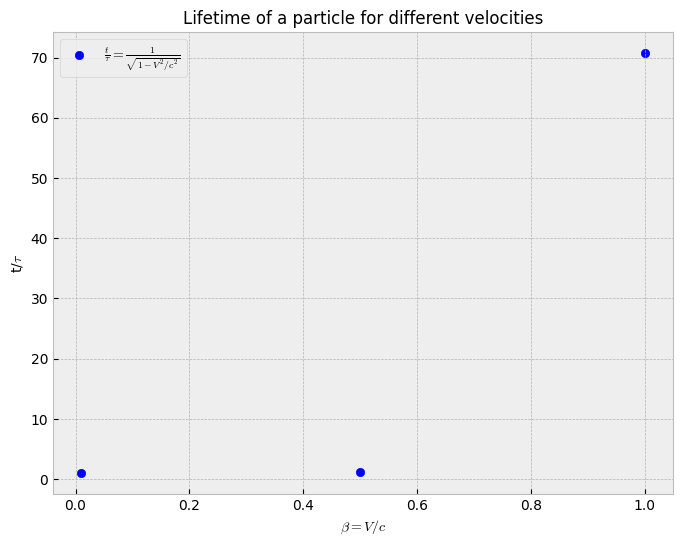

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as sc

#speed of light in vaccum
c= sc.c           # in meter/sec.     

proper_time= 1

# list of the three different velocity of particle
Vs= [0.01*c, 0.5*c, 0.9999*c]

def rel_time(proper_time, velocity):
    #beta = v/c
    beta= velocity/c
    #relative time = t/tau
    return 1/np.sqrt(1- beta**2 )

# Calculating the lifetime of the particle for different velcity values
rel_time_values = [rel_time(proper_time, i) for i in Vs]

#print the values of relative lifetime
print('The relative lifetime of the particle for three different velocities are', np.round(rel_time_values, 5))

#plotting
plt.figure(figsize=(8,6))
plt.scatter([i/c for i in Vs], rel_time_values, color= 'blue', label= r"$\frac{t}{\tau}= \frac{1}{\sqrt{1- V^2/c^2}}$")
plt.xlabel(r"$\beta = V/c$", fontsize= 10)
plt.ylabel(r"t/$\tau$", fontsize= 10)
plt.title(r"Lifetime of a particle for different velocities", fontsize= 12)
plt.legend(loc= 'best')
plt.grid(True)
plt.show()

#### Question 6.(a)

#### Solution :

In [7]:
import numpy as np

#velocity values(V/c)
betas= [0.01, 0.5, 0.9999]

def g(beta):
    return 1/np.sqrt(1- beta**2)
gammas= [g(i) for i in betas]
print(r'The values of $\gamma$ are',np.round(gammas,2))

The values of $\gamma$ are [ 1.    1.15 70.71]
